In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


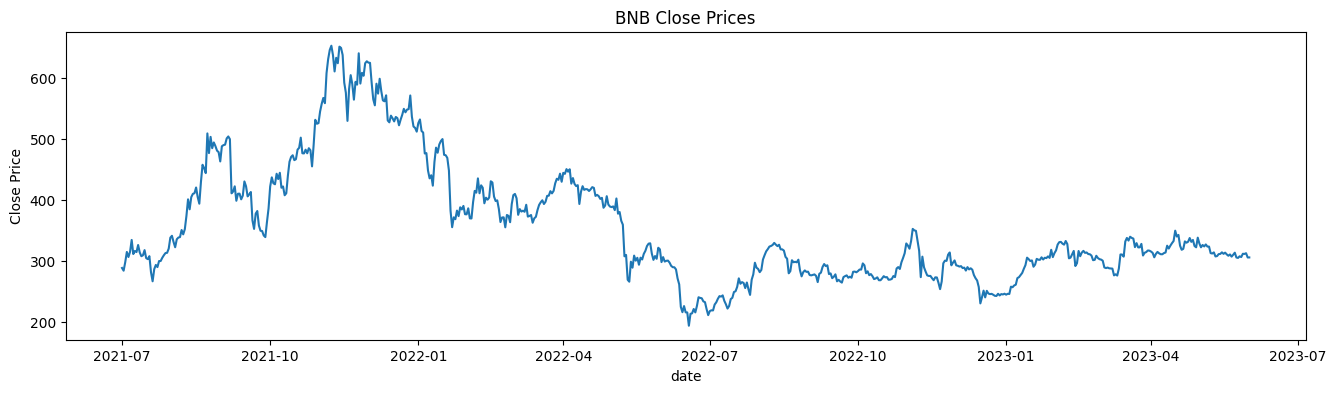

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  701
Model:                ARIMA(75, 1, 1)   Log Likelihood               -2788.103
Date:                Sun, 04 Jun 2023   AIC                           5730.205
Time:                        16:14:56   BIC                           6080.638
Sample:                    07-01-2021   HQIC                          5865.668
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5577      0.639     -0.872      0.383      -1.810       0.695
ar.L2         -0.0044      0.062     -0.072      0.943      -0.126       0.117
ar.L3          0.0383      0.046      0.827      0.4

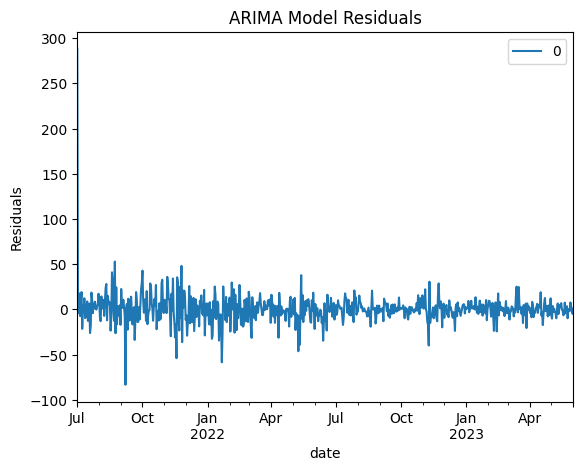

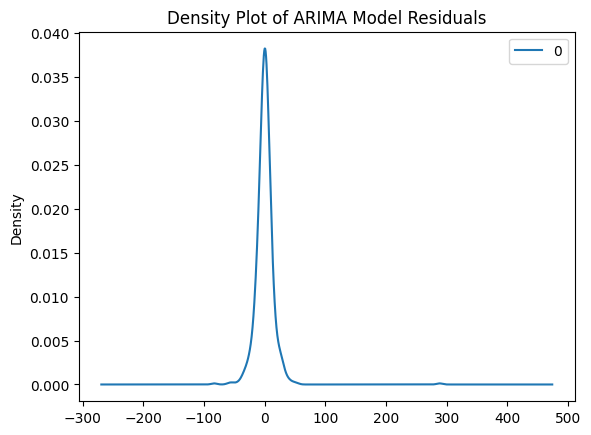

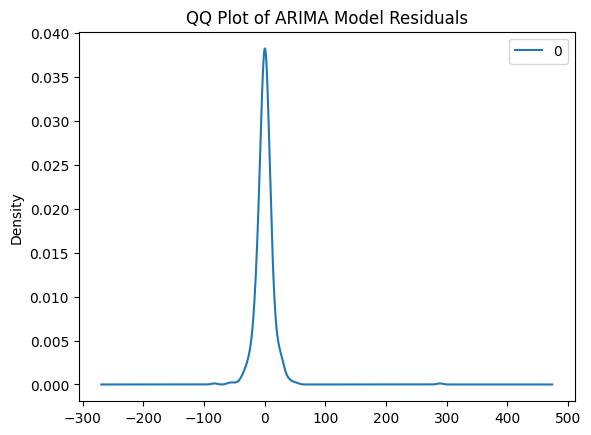

2023-06-02    304.637202
2023-06-03    305.473434
2023-06-04    306.819444
2023-06-05    309.637054
2023-06-06    308.451496
2023-06-07    304.704801
2023-06-08    304.191034
2023-06-09    302.141346
2023-06-10    300.830493
2023-06-11    302.210627
2023-06-12    301.937512
2023-06-13    303.071206
2023-06-14    303.741840
2023-06-15    301.350860
2023-06-16    303.276245
2023-06-17    303.351142
2023-06-18    303.469839
2023-06-19    307.314902
2023-06-20    305.301274
2023-06-21    305.945786
2023-06-22    308.078924
2023-06-23    307.845226
2023-06-24    308.477143
2023-06-25    307.298720
2023-06-26    306.492405
2023-06-27    306.002907
2023-06-28    306.333789
2023-06-29    307.911314
2023-06-30    306.221504
2023-07-01    309.215679
2023-07-02    308.993142
2023-07-03    307.683615
2023-07-04    308.324933
2023-07-05    309.187766
2023-07-06    311.366664
2023-07-07    308.297402
2023-07-08    309.247295
2023-07-09    311.012575
2023-07-10    310.563459
2023-07-11    311.548250


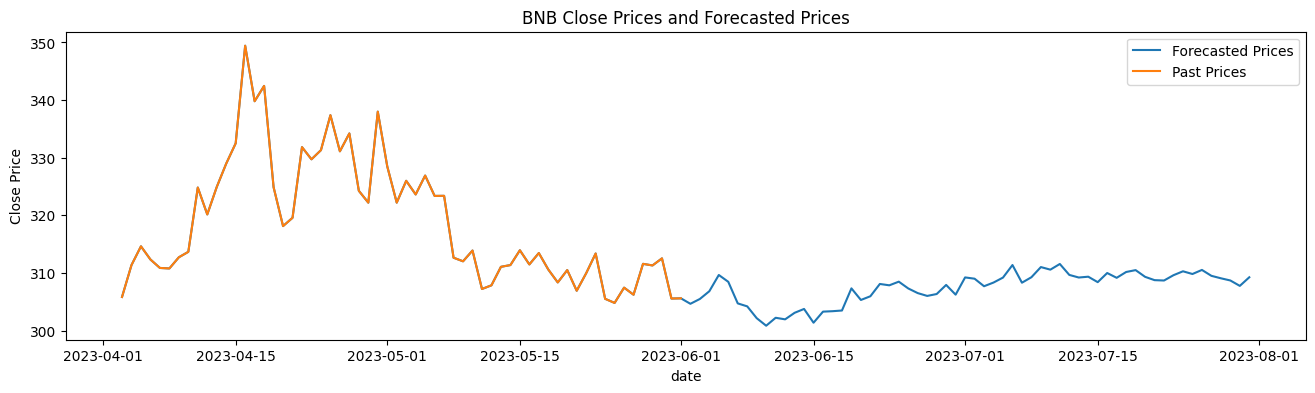

MAE: 13.9723
RMSE: 17.6278
MAPE: 4.2791%
SMAPE: 4.4263%


In [ ]:
# 匯入必要的套件
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# 匯入價格資料
df = pd.read_csv('BNB_ARIMA.csv')

# 將日期欄位轉換為datetime格式並設為索引
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# 將資料重新取樣為日頻率（D）
df = df.resample("D").ffill()

# 繪製時序圖
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(df.index, df["close"])
plt.xlabel("date")
plt.ylabel("Close Price")
plt.title("BNB Close Prices")
plt.show()

# 建立ARIMA模型
model = ARIMA(df["close"], order=(75, 1, 1))

# 擬合模型並印出診斷報告
results = model.fit()
print(results.summary())

# 繪製殘差的時序圖
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.xlabel("date")
plt.ylabel("Residuals")
plt.title("ARIMA Model Residuals")
plt.show()

# 繪製殘差的密度圖和QQ圖
residuals.plot(kind='kde')
plt.title("Density Plot of ARIMA Model Residuals")
plt.show()
residuals.plot(kind='kde')
plt.title("QQ Plot of ARIMA Model Residuals")
plt.show()

# 預測未來兩個月的價格
forecast = results.forecast(steps=60)
print(forecast)

# 取過去60天的價格資料
past_prices = df["close"].tail(60)

# 預測未來60天的價格
forecast = results.forecast(steps=60)

# 將過去60天的價格資料和未來60天的預測價格合併
all_prices = pd.concat([past_prices, forecast], axis=0)

# 繪製過去60天和未來60天的價格資料
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(all_prices.index, all_prices, label="Forecasted Prices")
ax.plot(past_prices.index, past_prices, label="Past Prices")
plt.xlabel("date")
plt.ylabel("Close Price")
plt.title("BNB Close Prices and Forecasted Prices")
plt.legend()
plt.show()


forecast_values = forecast[0]
actual_values = df["close"].tail(60)
mae = np.mean(np.abs(actual_values - forecast_values))
rmse = np.sqrt(np.mean((actual_values - forecast_values) ** 2))
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100
smape = np.mean(2 * np.abs(forecast_values - actual_values) / (np.abs(actual_values) + np.abs(forecast_values))) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"SMAPE: {smape:.4f}%")